In [1]:
import pandas as pd
import math

In [2]:
def load_csv(file_path):
    df = pd.read_csv(file_path, header=None)
    return df

In [59]:
def ez_rel(example, fill_col=2, cand=0):
    valid = example[fill_col].dropna()
    number = len(valid)
    cands = ['+', '-1', '-2','*','/1','/2','max','min','avg']
    for i in range(len(cands)):
        cand = i
        pos = True
        for j in range(number):
            if cands[cand]=="+" and (not math.isclose(example[0][j]+example[1][j], example[2][j], abs_tol=0.001)):
                pos = False
            elif cands[cand]=="-1" and (not math.isclose(example[0][j]-example[1][j], example[2][j], abs_tol=0.001)):
                pos = False
            elif cands[cand]=="-2" and (not math.isclose(example[1][j]-example[0][j], example[2][j], abs_tol=0.001)):
                pos = False
            elif cands[cand]=="*" and (not math.isclose(example[0][j]*example[1][j], example[2][j], abs_tol=0.001)):
                pos = False
            elif cands[cand]=="/1":
                try:
                    temp = example[0][j]/example[1][j]
                except ZeroDivisionError:
                    temp = 0
                if not math.isclose(temp, example[2][j]):
                    pos = False 
            elif cands[cand]=="/2":
                try:
                    temp = example[1][j]/example[0][j]
                except ZeroDivisionError:
                    temp = 0
                if not math.isclose(temp, example[2][j]):
                    pos = False 
            elif cands[cand]=="max" and (not math.isclose(max(example[0][j], example[1][j]), example[2][j], abs_tol=0.001)):
                pos = False 
            elif cands[cand]=="min" and (not math.isclose(min(example[0][j], example[1][j]), example[2][j], abs_tol=0.001)):
                pos = False
            elif cands[cand]=="avg" and (not math.isclose((example[0][j]+example[1][j])/2, example[2][j], abs_tol=0.001)):
                pos = False        
            if not pos:
                break
        if pos:
            return cands[cand], cand
    return None, cand

In [5]:
from ez_numeric_2cols import ez_rel

example = load_csv("../tests/col1_divide_col2.csv")
ez_rel(example)

/Users/arya/cs6386/6386-spreadsheet/src/ez_numeric_2cols.py:25: RuntimeWarning: divide by zero encountered in scalar divide
  temp = example[0][j]/example[1][j]


(None, 8)

In [6]:
from multiple_rows import multiple_row_sum_avg, fill_multiple_row_sum_avg

example1 = load_csv("../tests/avg_of_three_rows.csv")
op, result = multiple_row_sum_avg(example1)
# print(op, result)

filled = fill_multiple_row_sum_avg(example1, op, result)
# print(filled)

expected = load_csv("../tests/avg_of_three_rows_expected.csv")
# print(expected.compare(filled))
pd.testing.assert_frame_equal(expected, filled, check_dtype = False, atol = 0.01)

In [3]:
from multiple_rows import filter_sum_avg, fill_filter_sum_avg

example2 = load_csv("../tests/filter_on_col1_avg.csv")
col, op = filter_sum_avg(example2)
# print(col, op)

filled2 = fill_filter_sum_avg(example2, col, op)
# print(filled2)

expected2 = load_csv("../tests/filter_on_col1_avg_expected.csv")
# print(expected2.compare(filled2))
pd.testing.assert_frame_equal(expected2, filled2, check_dtype = False, atol = 0.01)


In [4]:
from multiple_rows import filter_count, fill_filter_count

example3 = load_csv("../tests/filter_on_col_count.csv")
trial = filter_count(example3)
# print(trial)

filled = fill_filter_count(example3, trial)
# print(filled)

expected = load_csv("../tests/filter_on_col_count_expected.csv")
# print(expected.compare(filled))
pd.testing.assert_frame_equal(expected, filled, check_dtype = False, atol = 0.01)

In [3]:
from weighted_col import weighted_sum, fill_weighted_sum

example4 = load_csv("../tests/weighted_sum_of_two_cols_2.csv")
trial, w1, w2 = weighted_sum(example4)
# print(trial, w1, w2)

filled = fill_weighted_sum(example4, trial, w1, w2)
# print(filled)

expected = load_csv("../tests/weighted_sum_of_two_cols_2_expected.csv")
# print(expected.compare(filled))
pd.testing.assert_frame_equal(expected, filled, check_dtype = False, atol = 0.01)

In [5]:
from empty_entries import remove_empty_entries

example5 = load_csv("../tests/sum_of_two_col_missing_entry.csv")
remove_empty_entries(example5)

(True,
 True,
        0     1    2
 0    1.0   0.0  1.0
 1    2.0   4.0  6.0
 2    2.0   3.0  5.0
 3    3.0   8.0  NaN
 4   10.0  10.0  NaN
 5    5.0   5.0  NaN
 6    4.0   4.0  NaN
 7   19.0   4.0  NaN
 8    2.0  21.0  NaN
 9    1.0  21.0  NaN
 10   0.0  10.0  NaN
 11   7.0   7.0  NaN
 12   4.0   4.0  NaN
 13   3.0   3.0  NaN
 14  12.0   0.0  NaN
 15   4.0  16.0  NaN
 16   1.0  16.0  NaN
 17  26.0  27.0  NaN
 18   8.0   8.0  NaN
 19   3.0   3.0  NaN
 20   3.0   3.0  NaN
 21   8.0  11.0  NaN
 22   4.0   4.0  NaN)

In [3]:
from tailing import tailing

example6 = load_csv("../tests/sum_with_extra_col_row.csv")
tailing(example6)

,0,1,2
0,1,0,1.0
1,2,4,6.0
2,2,3,5.0
3,3,8,11.0
4,10,10,20.0
5,5,5,NaN
6,4,4,NaN
7,19,4,NaN
8,2,21,NaN
9,1,21,NaN


In [34]:
from main import *

filled = autofill("../tests/avg_of_three_rows.csv")
# print(filled)
check(filled, "../tests/avg_of_three_rows_expected.csv")

AttributeError: 'str' object has no attribute 'shape'

In [3]:
# from sympy import symbols, Eq, solve


# def solver(rows):
#     col_num = len(rows[0])
#     col_num -= 1
#     if col_num > len(rows):
#         return None
    
#     # Create variables
#     var = {}
#     acsii = 97
#     for i in range(col_num):
#         sym = chr(acsii+i)
#         symStr = str(sym)
#         var[symStr] = symbols(sym) 
    
#     # Create equations
#     equations = []
#     for i in range(col_num):
#         lhs = sum([coeff * var[v] for coeff, v in zip(rows[i][:-1], var)])
#         result = rows[i][-1]
#         eq = Eq(lhs, result) 
#         equations.append(eq)

#     sol = solve(equations)

#     co = {str(v): sol[var[v]] for v in var}
#     coef = [co[v] for v in var]
    
#     # Verify coefficients in the remaining rows, if exists
#     for i in range(len(rows) - col_num):
#         # print("here")
#         result = rows[col_num+i][-1]
#         nums = rows[col_num+i][:-1]
#         temp = 0
#         for j in range(len(coef)):
#             temp += coef[j] * nums[j]
#         if temp != result:
#             return None

#     return coef

In [4]:
# def weighted_sum(table):
#     col_num = table.shape[1]
#     examples = table[col_num-1].dropna()
#     num = len(examples)
#     sample = table[:][:num].values.tolist()
    
#     return solver(sample)


In [5]:
example4 = load_csv("../tests/weighted_sum_of_two_cols.csv")

In [12]:

weighted= weighted_sum(example4)
# print(weighted)

In [20]:
# def fill_weighted_sum(table, weight):
#     if weight == None:
#         raise Exception("not weighted_sum formula")
    
#     col_num = table.shape[1]
#     row_num = table.shape[0]
#     examples = table[col_num-1].dropna()

#     new = table.copy()

#     for i in range(row_num):
#         result = 0
#         for j in range(len(weight)):
#             result += weight[j] * table[j][i]
#         new.iloc[i,-1] = result

#     return new

In [4]:
from main import *
from weighted_col import *

file = "../tests/weighted_negative_sum_of_three_cols.csv"
example4 = load_csv(file)
# weighted= weighted_sum(example4)
# result = fill_weighted_sum(example4, weighted)
result = autofill(example4)
from main import *
file = file[:-4] + "_expected.csv"
check(result, file)

/Users/arya/cs6386/6386-FinalProject/src/ez_numeric_2cols.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  temp = example[0][j]/example[1][j]


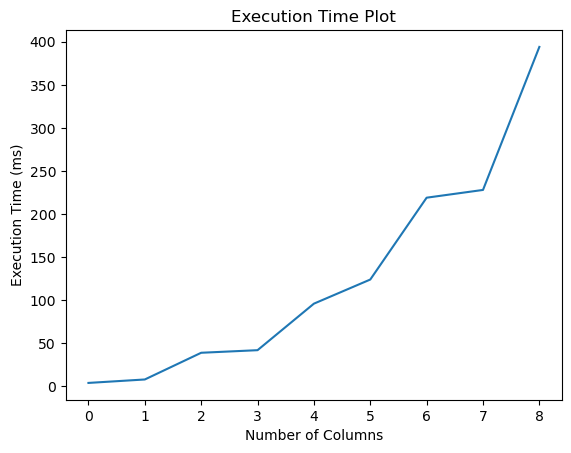

In [14]:
import matplotlib.pyplot as plt


data = [4, 8, 39, 42, 96, 124, 219, 228, 394]

plt.plot(data)

plt.xlabel('Number of Columns')
plt.ylabel('Execution Time (ms)')
plt.title('Execution Time Plot')

plt.show()